# Setup
1. Retrieve data from the worldcupdata.json file
2. create a dataframe

In [16]:
import json
import pandas


wc_data = json.load(open("worldcupdata.json", "r"))
df = pandas.DataFrame(wc_data)

# Countries which have won the Women's and Men's world cup
1. Find the intersection of countries which have won both the men's and women's world cup
2. Concatenate the year and competition values for each country

In [17]:
# Identify countries that won both men's and women's competitions
both_winners = df.groupby('country').apply(lambda x: set(x['competition'])).reset_index()
both_winners = both_winners[both_winners[0].apply(lambda x: {'men', 'women'}.issubset(x))]['country'].tolist()

# For these countries, concatenate the year and competition values
records = []
for country in both_winners:
    country_data = df[df['country'] == country]
    combined_years_competition = ', '.join([f"{row['year']}({row['competition']})" for _, row in country_data.iterrows()])
    records.append({'Country': country, 'Years and Competitions': combined_years_competition})

# Create the final dataframe
result_df = pandas.DataFrame(records)
result_df

,Country,Years and Competitions
0,Germany,"2014(men), 2003(women), 2007(women)"
1,Spain,"2010(men), 2023(women)"


# Number of wins by country
Bar chart of World Cup wins by country. Sort highest to lowest.


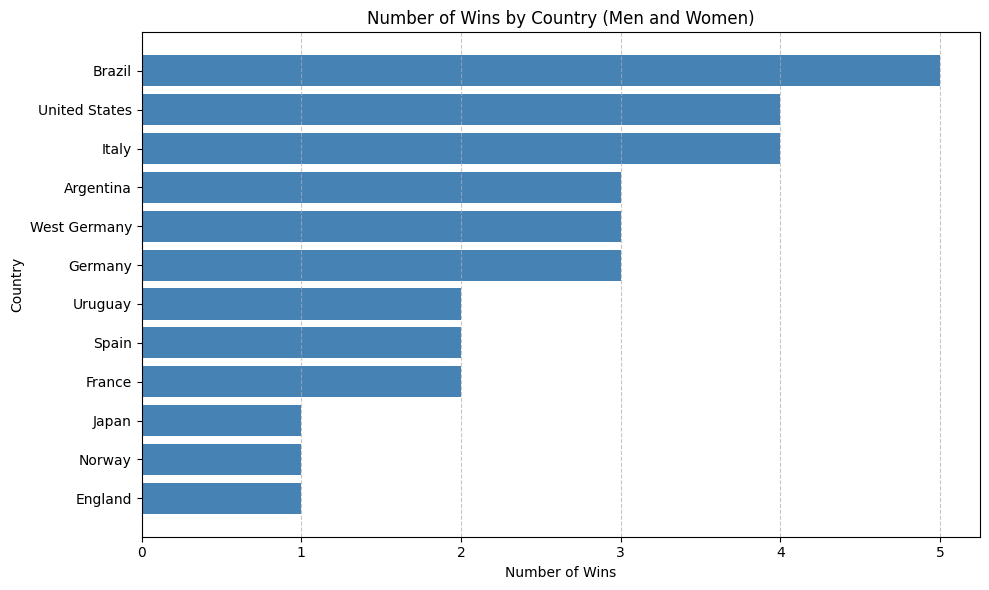

In [15]:
import matplotlib.pyplot as plt

# Get the value counts
s = df['country'].value_counts()

# Plot the data
s = s.sort_values()
plt.figure(figsize=(10, 6))
plt.barh(s.index, s.values, color='steelblue')

# Add title and axis labels
plt.title('Number of Wins by Country (Men and Women)')
plt.xlabel('Number of Wins')
plt.ylabel('Country')

# Show the plot
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()  # Adjusts subplot params for the layout to be better.
plt.show()